# Laboratory #4_1 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import random
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import confusion_matrix


# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




170508288/170498071 [==============================] - 3s 0us/step


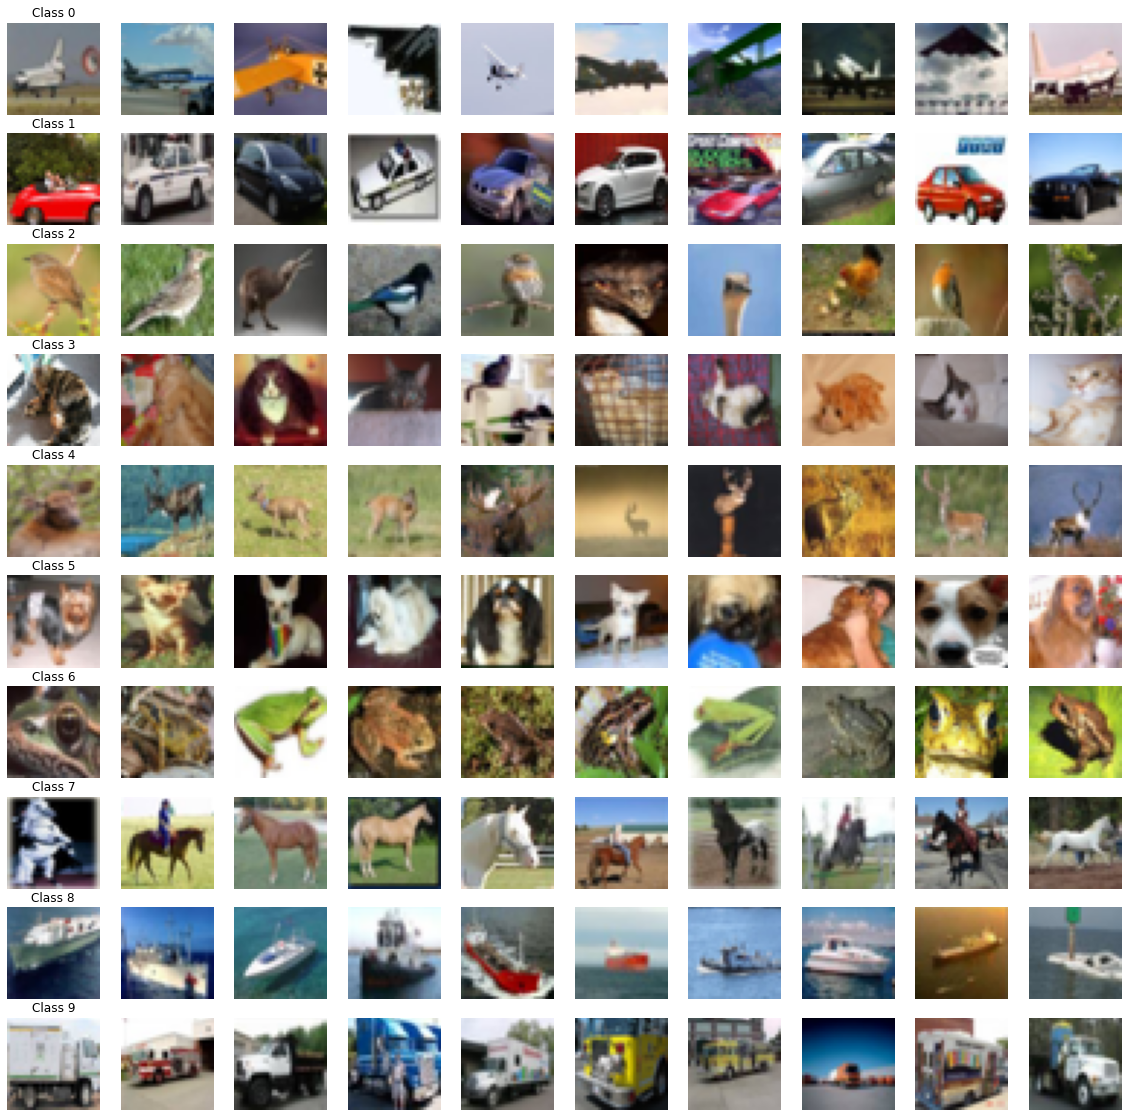

In [ ]:
# solution
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

#visualization
fig, plots = plt.subplots(10,10, figsize=(20,20))

for i in range(10): #for each class
  samples = random.sample(list(np.where(y_train == i)[0]), 10) #10 random samples
  plots[i][0].set_title('Class ' + str(i))
  
  for j in range(10):
    plots[i][j].imshow(x_train[samples[j]])
    plots[i][j].axis('off')

fig.show()

#one-hot encoading
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3))) #convolutional layer
model.add(MaxPooling2D((2, 2))) #max pooling layer
model.add(Flatten()) #flat filter maps
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) #dense layer
model.add(Dense(10, activation='softmax')) #classification layer


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, epochs=32, validation_split=0.1)

Epoch 1/32
88/88 [==============================] - 11s 21ms/step - loss: 2.1411 - accuracy: 0.2301 - val_loss: 1.9986 - val_accuracy: 0.2968
Epoch 2/32
88/88 [==============================] - 1s 16ms/step - loss: 1.9540 - accuracy: 0.3124 - val_loss: 1.8992 - val_accuracy: 0.3402
Epoch 3/32
88/88 [==============================] - 1s 15ms/step - loss: 1.8789 - accuracy: 0.3387 - val_loss: 1.8544 - val_accuracy: 0.3560
Epoch 4/32
88/88 [==============================] - 1s 16ms/step - loss: 1.8323 - accuracy: 0.3580 - val_loss: 1.8120 - val_accuracy: 0.3610
Epoch 5/32
88/88 [==============================] - 1s 16ms/step - loss: 1.7805 - accuracy: 0.3773 - val_loss: 1.7605 - val_accuracy: 0.3930
Epoch 6/32
88/88 [==============================] - 1s 16ms/step - loss: 1.7464 - accuracy: 0.3901 - val_loss: 1.7517 - val_accuracy: 0.3898
Epoch 7/32
88/88 [==============================] - 1s 16ms/step - loss: 1.7167 - accuracy: 0.4004 - val_loss: 1.7148 - val_accuracy: 0.4020
Epoch 8/32
8

### Save Model

In [ ]:
model.save('/content/drive/MyDrive/MAI/CV/LABS/CV7/model1.h5')

### Load Model

In [ ]:
model1 = keras.models.load_model('/content/drive/MyDrive/MAI/CV/LABS/CV7/model1.h5')

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 512 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
model = Sequential()

#two convolutional layers followed by max pooling layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten()) #flatten
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) #dense layer
model.add(Dense(10, activation='softmax')) #classification layer

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(x_train, y_train, batch_size=512, epochs=32, validation_split=0.1)

Epoch 1/32
88/88 [==============================] - 4s 39ms/step - loss: 2.1497 - accuracy: 0.2129 - val_loss: 2.0186 - val_accuracy: 0.2848
Epoch 2/32
88/88 [==============================] - 3s 32ms/step - loss: 1.9840 - accuracy: 0.2975 - val_loss: 1.8972 - val_accuracy: 0.3288
Epoch 3/32
88/88 [==============================] - 3s 33ms/step - loss: 1.8796 - accuracy: 0.3393 - val_loss: 1.8300 - val_accuracy: 0.3474
Epoch 4/32
88/88 [==============================] - 3s 33ms/step - loss: 1.7989 - accuracy: 0.3677 - val_loss: 1.7887 - val_accuracy: 0.3694
Epoch 5/32
88/88 [==============================] - 3s 33ms/step - loss: 1.7343 - accuracy: 0.3923 - val_loss: 1.7735 - val_accuracy: 0.3756
Epoch 6/32
88/88 [==============================] - 3s 33ms/step - loss: 1.6821 - accuracy: 0.4115 - val_loss: 1.6870 - val_accuracy: 0.4058
Epoch 7/32
88/88 [==============================] - 3s 33ms/step - loss: 1.6234 - accuracy: 0.4315 - val_loss: 1.6279 - val_accuracy: 0.4224
Epoch 8/32
88

### Save Model

In [ ]:
model.save('/content/drive/MyDrive/MAI/CV/LABS/CV7/model2.h5')


### Load Model

In [ ]:
model2 = keras.models.load_model('/content/drive/MyDrive/MAI/CV/LABS/CV7/model2.h5')

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

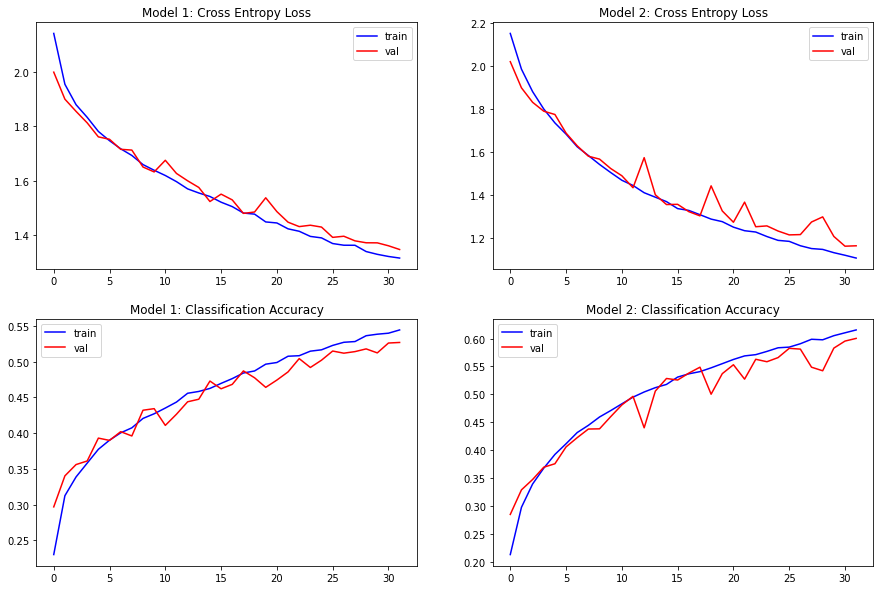

In [ ]:
# solution

fig, plot = plt.subplots(2,2, figsize=(15,10))

for ax, col in zip(plot[0], ['Model 1', 'Model 2']):
    ax.set_title(col)

# loss model1
plot[0,0].set_title('Model 1: Cross Entropy Loss')
plot[0,0].plot(history.history['loss'], color='blue', label='train')
plot[0,0].plot(history.history['val_loss'], color='red', label='val')
plot[0,0].legend()

# accuracy model1
plot[1,0].set_title('Model 1: Classification Accuracy')
plot[1,0].plot(history.history['accuracy'], color='blue', label='train')
plot[1,0].plot(history.history['val_accuracy'], color='red', label='val')
plot[1,0].legend()

# loss model1
plot[0,1].set_title('Model 2: Cross Entropy Loss')
plot[0,1].plot(history2.history['loss'], color='blue', label='train')
plot[0,1].plot(history2.history['val_loss'], color='red', label='val')
plot[0,1].legend()

# accuracy model1
plot[1,1].set_title('Model 2: Classification Accuracy')
plot[1,1].plot(history2.history['accuracy'], color='blue', label='train')
plot[1,1].plot(history2.history['val_accuracy'], color='red', label='val')
plot[1,1].legend()

fig.show()


**Solution**

We can see that the performance of both models is very similar, but we can see that the second model performs a little better. The results obtained (in one execution, they vary with each execution) with 32 epochs for loss, accuracy, loss validation and validation accuracy are:

    loss: 1.3147 - accuracy: 0.5443 - val_loss: 1.3462 - val_accuracy: 0.5268
    loss: 1.1068 - accuracy: 0.6154 - val_loss: 1.1638 - val_accuracy: 0.6002

Although we see that the deeper model has better results, with only 32 epochs we cannot affirm that one model performs considerably better than the other, we should increase the number of epochs to see the long-term performance.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# solution

print('Model 1')

#predictions
predictions1 = model1.predict(x_test) #probability of belonging to each class
predictions1 = np.argmax(predictions1, axis=1) #class with more probability

#confusion matrix
gt = np.argmax(y_test, axis=1) #true class 
print(confusion_matrix(gt, predictions1))


print('\nModel 2')

#predictions
predictions2 = model2.predict(x_test) #probability of belonging to each class
predictions2 = np.argmax(predictions2, axis=1) #class with more probability

#confusion matrix
gt = np.argmax(y_test, axis=1) #true class 
print(confusion_matrix(gt, predictions2))


Model 1
[[642  13  86  18  29  14  27  13 109  49]
 [ 75 538  21   9  15  21  33  23  63 202]
 [ 82   6 400  58 198  79 107  39  18  13]
 [ 29  12 100 295 137 204 138  40  13  32]
 [ 38   4  98  38 559  56 129  59  11   8]
 [ 18   2 107 150 142 408  90  58  13  12]
 [ 13   3  51  46 140  35 668  21   8  15]
 [ 33   4  46  43 148  92  47 528   8  51]
 [174  44  26  16  19  24  10  11 625  51]
 [ 78  96  19  26  18  17  40  35  50 621]]

Model 2
[[705  32  65  39   7   4  15  10  69  54]
 [ 47 685   6  18   4   5  14  14  34 173]
 [ 82  14 484 109  72  73  68  57  17  24]
 [ 26  16  70 549  42 136  56  55  12  38]
 [ 40   7 160 133 400  41  77 114  12  16]
 [ 13   6  86 275  51 435  33  79  11  11]
 [ 10  20  79 140  51  27 614  24   7  28]
 [ 23   4  33  98  50  57   9 678   5  43]
 [144  69  19  37   5   6   9   5 638  68]
 [ 55 122  11  30   4   7  17  34  39 681]]


**Solution**

We can observe that there are a lot of instances wrongly classified, this is because the number of epochs was quite low, only 32.

We can see for example that with the second model most of the instances of class 1 (cars) have been correctly classified (the number of false negatives is relatively low), however, some of them have been classified to class 9 (trucks). This makes sense, as most of the classes are related to animals, and the class of trucks is the most similar.

If we want to compare cats and dogs, classes 3 and 5 respectively, we notice that the numbers of false positives and negatives are quite high in both models, this means that they are very similar.

*    Print the test accuracy for the trained model.

In [ ]:
# solution

print('Model 1')

test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


print('model 2')

test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Model 1
313/313 [==============================] - 1s 4ms/step - loss: 1.3359 - accuracy: 0.5284
Test loss: 1.335861086845398
Test accuracy: 0.5284000039100647
model 2
313/313 [==============================] - 2s 5ms/step - loss: 1.1724 - accuracy: 0.5869
Test loss: 1.1723862886428833
Test accuracy: 0.586899995803833


## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
from keras.layers import Reshape
# solution
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Resizing(64, 64, interpolation='bilinear'))

#two convolutional layers with 64 filters followed by max pooling layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

#two convolutional layers with 128 filters followed by max pooling
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

#two convolutional layers with 256 filters followed by max pooling
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2), padding='same'))

#flattening
model.add(Flatten())

#dense layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# solution

#compilation
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#train
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)


Epoch 1/100
1407/1407 [==============================] - 67s 47ms/step - loss: 1.7355 - accuracy: 0.3674 - val_loss: 1.3981 - val_accuracy: 0.4942
Epoch 2/100
1407/1407 [==============================] - 65s 46ms/step - loss: 1.3136 - accuracy: 0.5333 - val_loss: 1.3405 - val_accuracy: 0.5252
Epoch 3/100
1407/1407 [==============================] - 66s 47ms/step - loss: 1.1068 - accuracy: 0.6098 - val_loss: 1.1561 - val_accuracy: 0.5968
Epoch 4/100
1407/1407 [==============================] - 65s 47ms/step - loss: 0.9531 - accuracy: 0.6657 - val_loss: 1.1198 - val_accuracy: 0.6084
Epoch 5/100
1407/1407 [==============================] - 64s 46ms/step - loss: 0.8188 - accuracy: 0.7143 - val_loss: 1.2450 - val_accuracy: 0.5780
Epoch 6/100
1407/1407 [==============================] - 65s 46ms/step - loss: 0.6997 - accuracy: 0.7573 - val_loss: 0.9252 - val_accuracy: 0.6826
Epoch 7/100
1407/1407 [==============================] - 64s 46ms/step - loss: 0.5820 - accuracy: 0.7973 - val_loss: 0

In [ ]:
#prediction
predictions = model.predict(x_test) #probability of belonging to each class
predictions = np.argmax(predictions, axis=1) #class with more probability
#confusion matrix
gt = np.argmax(y_test, axis=1) #true class 
print(confusion_matrix(gt, predictions))

[[778  18  38  16  18   8  12   6  65  41]
 [ 22 835   4  10   3   5  12   1  31  77]
 [ 61   5 628  58  81  60  50  33  12  12]
 [ 18   7  66 530  72 164  68  43  13  19]
 [ 21   3  69  64 679  36  44  65  14   5]
 [ 13   4  59 181  52 605  20  51   8   7]
 [  9   4  55  61  42  29 781   9   7   3]
 [ 14   8  26  38  68  58   5 766   3  14]
 [ 67  31  12  16   7  10   7   1 814  35]
 [ 36  62  15  12   7   6   5  10  25 822]]


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 2.9813 - accuracy: 0.7238
Test loss: 2.981292486190796
Test accuracy: 0.723800003528595


In this case the results are a lot better than before, we can see that the false positives and negatives are a lot lower and the accuracy is also higher.

As before, we can see several misclassifications between classes 3 and 5, corresponding to cats and dogs. Or very few misclassifications between classes 7 and 8, corresponding to horses and ships.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

The use of an activation function in a neural network is to introduce non-linearity into the output of a neuron, it helps the network to learn complex patterns.

Sigmoid activation function is used for the two-class logistic regression, whereas softmax is used for multiclass logistic regression.

Categorical cross entropy assumes that each instance belongs to only one class, while binary cross entropy works for each class separately and an instance can belong to more than one class or in none.


---

## **End of P4_1: Image Classification using CNN**
Deadline for P4_1 submission in CampusVirtual is: **Monday, the 29th of November, 2021**